In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Week 4: Lecture 08 ##

## Categorical Distribution ##

In [16]:
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies.where('Studio','Buena Vista').sort('Year')

Title,Studio,Gross,Gross (Adjusted),Year
Three Men and a Baby,Buena Vista,167780960,370746600,1987
Who Framed Roger Rabbit,Buena Vista,156452370,338409100,1988
Pretty Woman,Buena Vista,178406268,374948400,1990
Beauty and the Beast,Buena Vista,218967620,403283400,1991
Aladdin,Buena Vista,217350219,466212500,1992
The Lion King,Buena Vista,422783777,792511700,1994
Toy Story,Buena Vista,191796233,389989400,1995
Armageddon,Buena Vista,201578182,382096000,1998
The Sixth Sense,Buena Vista,293506292,511878400,1999
Toy Story 2,Buena Vista,245852179,425266700,1999


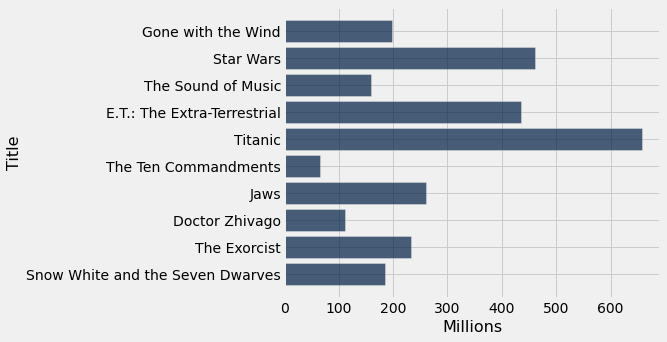

In [3]:
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross')/1000000,3))
top_movies.take(np.arange(10)).barh('Title', 'Millions')

In [4]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [5]:
studio_distribution = studios.group('Studio')
# in my top movies data set or table,
# how many of the movies listed were released by MGM?

# Table.group, by default, counts the number of times that unique element appeared in that table
# how many times is MGM in here?
# how many movies/individuals/rows were distributed by MGM?

In [9]:
studio_distribution.sort('count', descending = True)

Studio,count
Buena Vista,35
Warner Brothers,29
Paramount,25
Fox,24
Universal,23
Disney,11
Columbia,9
MGM,7
United Artists,6
Newline,5


In [10]:
sum(studio_distribution.column('count'))

200

In [11]:
help(Table.group)

Help on function group in module datascience.tables:

group(self, column_or_label, collect=None)
    Group rows by unique values in a column; count or aggregate others.
    
    Args:
        ``column_or_label``: values to group (column label or index, or array)
    
        ``collect``: a function applied to values in other columns for each group
    
    Returns:
        A Table with each row corresponding to a unique value in ``column_or_label``,
        where the first column contains the unique values from ``column_or_label``, and the
        second contains counts for each of the unique values. If ``collect`` is
        provided, a Table is returned with all original columns, each containing values
        calculated by first grouping rows according to ``column_or_label``, then applying
        ``collect`` to each set of grouped values in the other columns.
    
    Note:
        The grouped column will appear first in the result table. If ``collect`` does not
        accept argu

## Bar Charts ##

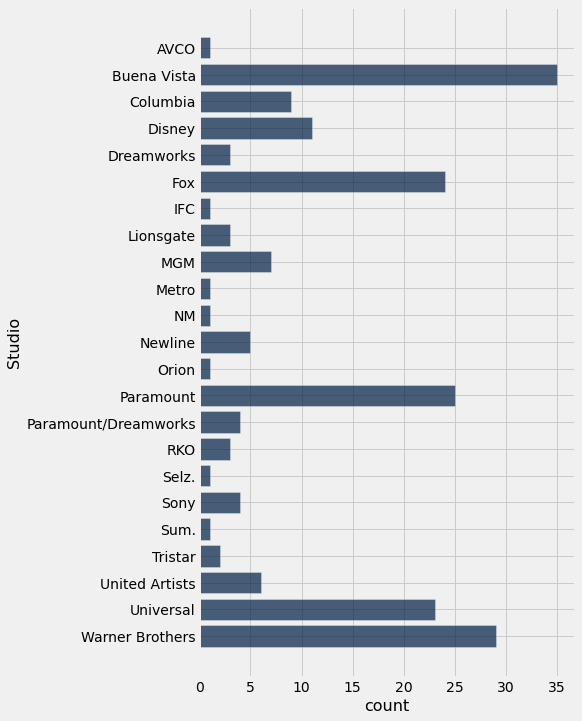

In [12]:
studio_distribution.barh('Studio')

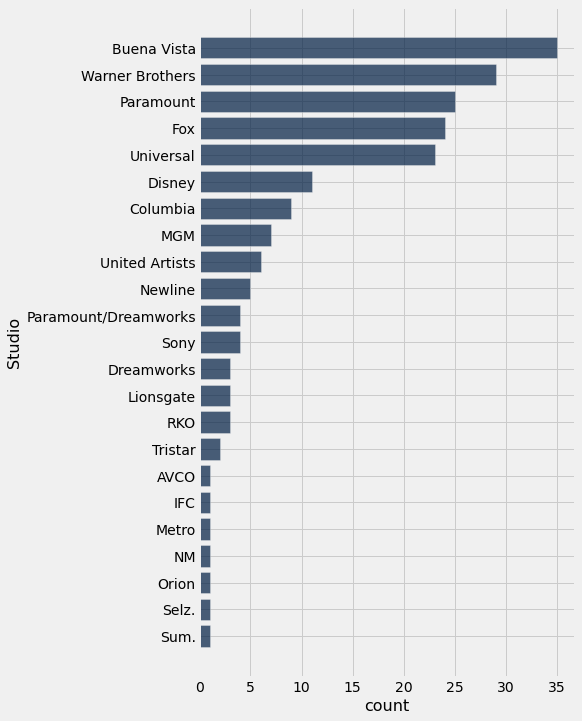

In [13]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [17]:
ages = 2022 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [18]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,80
Star Wars,Fox,460998007,1583483200,1977,42
The Sound of Music,Fox,158671368,1266072700,1965,54
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,37
Titanic,Paramount,658672302,1204368000,1997,22
The Ten Commandments,Paramount,65500000,1164590000,1956,63
Jaws,Universal,260000000,1138620700,1975,44
Doctor Zhivago,MGM,111721910,1103564200,1965,54
The Exorcist,Warner Brothers,232906145,983226600,1973,46
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,82


## Binning ##

In [19]:
min(ages), max(ages)

(2, 98)

In [20]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [21]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data
# most of the movies are in the [40-65) bin, with 51 movies in there
# I have 51 movies in my table, that are 40-64 years old.

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [36]:
help(Table.bin)

Help on function bin in module datascience.tables:

bin(self, *columns, **vargs)
    Group values by bin and compute counts per bin by column.
    
    By default, bins are chosen to contain all values in all columns. The
    following named arguments from numpy.histogram can be applied to
    specialize bin widths:
    
    If the original table has n columns, the resulting binned table has
    n+1 columns, where column 0 contains the lower bound of each bin.
    
    Args:
        ``columns`` (str or int): Labels or indices of columns to be
            binned. If empty, all columns are binned.
    
        ``bins`` (int or sequence of scalars): If bins is an int,
            it defines the number of equal-width bins in the given range
            (10, by default). If bins is a sequence, it defines the bin
            edges, including the rightmost edge, allowing for non-uniform
            bin widths.
    
        ``range`` ((float, float)): The lower and upper range of
            t

In [22]:
sum(binned_data.column('Age count'))

200

In [23]:
np.arange(0, 101, 25)

array([  0,  25,  50,  75, 100])

In [24]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,91
25,67
50,35
75,7
100,0


In [26]:
np.arange(0, 60, 25)

array([ 0, 25, 50])

In [25]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,91
25,68
50,0


In [28]:
help(Table.bin)

Help on function bin in module datascience.tables:

bin(self, *columns, **vargs)
    Group values by bin and compute counts per bin by column.
    
    By default, bins are chosen to contain all values in all columns. The
    following named arguments from numpy.histogram can be applied to
    specialize bin widths:
    
    If the original table has n columns, the resulting binned table has
    n+1 columns, where column 0 contains the lower bound of each bin.
    
    Args:
        ``columns`` (str or int): Labels or indices of columns to be
            binned. If empty, all columns are binned.
    
        ``bins`` (int or sequence of scalars): If bins is an int,
            it defines the number of equal-width bins in the given range
            (10, by default). If bins is a sequence, it defines the bin
            edges, including the rightmost edge, allowing for non-uniform
            bin widths.
    
        ``range`` ((float, float)): The lower and upper range of
            t

In [27]:
top_movies.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969,50


## Histograms ##

In [29]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [30]:
binned_data

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


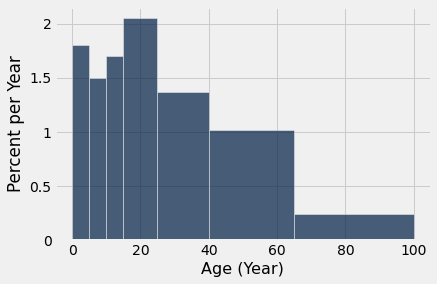

In [31]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

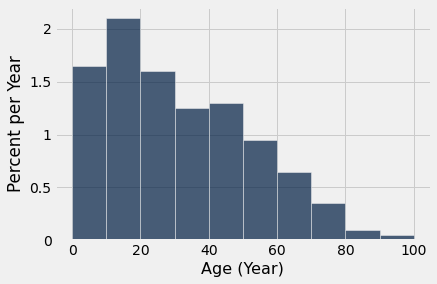

In [32]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

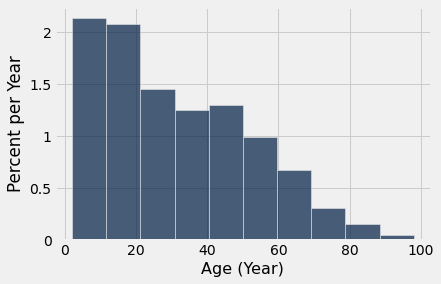

In [33]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

In [34]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [35]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


## Height ##

### Question: What is the height of the [40, 65] bin?

In [ ]:
# Step 1: Calculate % of movies in the [40, 65) bin
# we know it should 51/200
age_count_array = ...
age_count_array
percent = ...
percent # we are expecting 51/200 = 0.255 or 25.5%

In [ ]:
# Step 2: Calculate the width of the 40-65 bin
width = ...

In [ ]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = ...
height

### What are the heights of the rest of the bins?

In [ ]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(...))

In [ ]:
# Get the bin widths
bin_widths = np.diff(...)
bin_lefts = bin_lefts.with_column(...)

In [ ]:
# Get the bin heights
bin_heights = bin_lefts.column(...) / bin_widths
bin_lefts = bin_lefts.with_column(...)

In [ ]:
bin_lefts

In [ ]:
#generates histogram, with Age (year) on x-xis
top_movies.hist('Age', bins = my_bins, unit = 'Year')